## Determine whether a given bank customer will leave or not using Neural networks

### Importing required libraries

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
tf.enable_eager_execution()
tf.set_random_seed(23)

### Reading data from Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank.csv')

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Checking for null values and nan'**s**

In [6]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Checking the Data types of each columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Checking the unique values in each column

In [9]:
for i in range(0,14):
  print(data.columns[i])
  print(pd.unique(data.iloc[:,i]))
  print('_______________________________________________________________________________________') 

RowNumber
[    1     2     3 ...  9998  9999 10000]
_______________________________________________________________________________________
CustomerId
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
_______________________________________________________________________________________
Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
_______________________________________________________________________________________
CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 

In [0]:
data.drop(columns = {'RowNumber','CustomerId'}, inplace=True)

In [11]:
data.head(20)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### Checking Correlation between the columns

In [0]:
correlation = data.corr()

In [0]:
import seaborn as sns

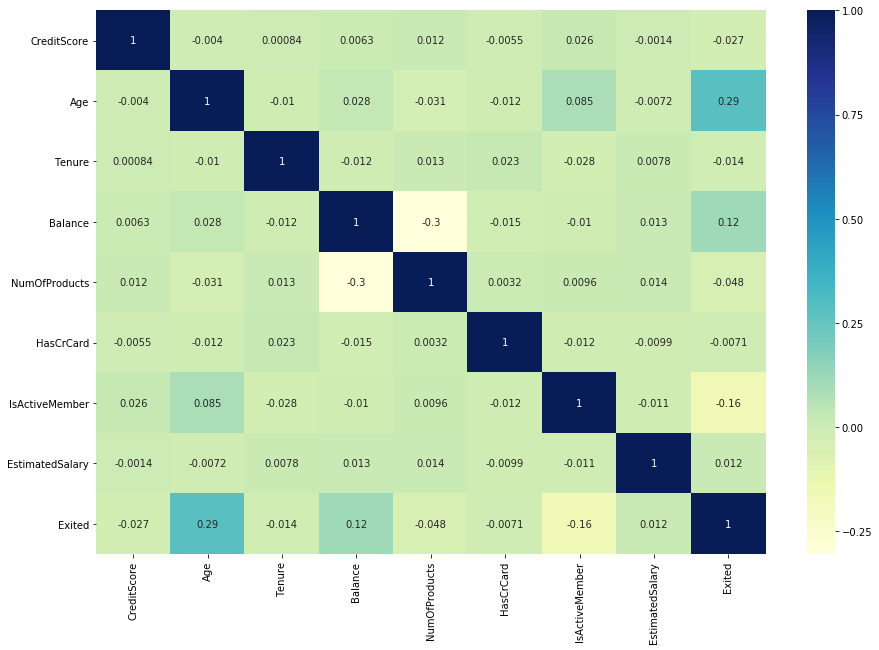

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlation, annot = True, cmap="YlGnBu", ax = ax)

### Visualizing Data

In [15]:
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [0]:
#data.loc[:,data.columns[0]]

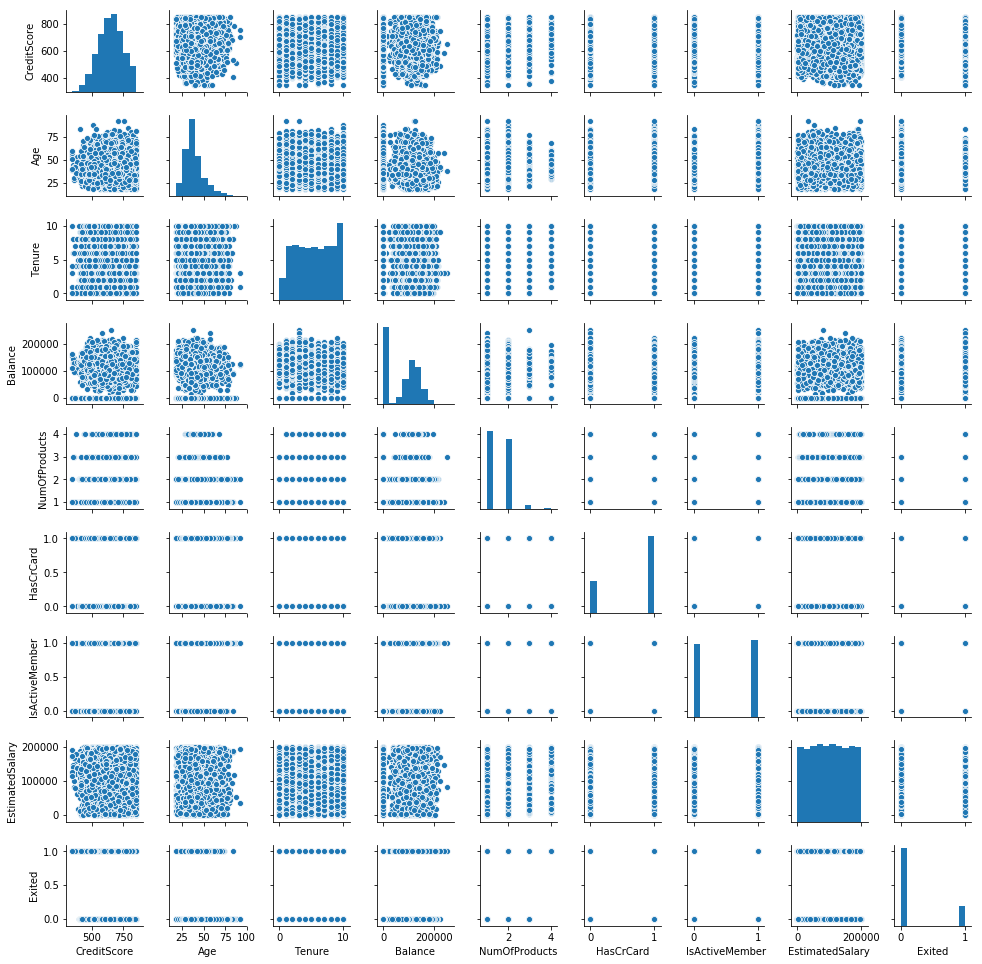

In [17]:
sns.pairplot(data, height = 1.5 )

In [0]:
#cols = data.columns
#for i in range(0,cols.size):
#  print(cols[i])
#  plt.hist(data[cols[i]])

In [19]:
data[data['Balance']<1].shape

(3617, 12)

In [20]:
data[data['Balance']>1].shape

(6383, 12)

In [21]:
data[data['Exited']>0].shape

(2037, 12)

In [22]:
data[data['Exited']<1].shape

(7963, 12)

### Logarithmic Transformation on the data

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


### Checking for Outliers and Treating them

In [24]:
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

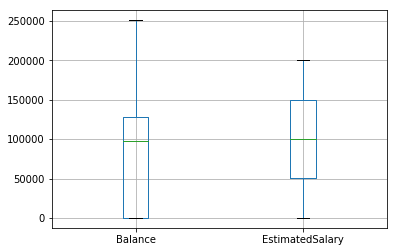

In [25]:
data.boxplot(column=['Balance','EstimatedSalary'])

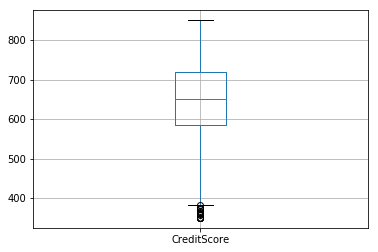

In [26]:
data.boxplot(column=['CreditScore'])

In [0]:
q1 = data['CreditScore'].quantile(0.25)
q3 = data['CreditScore'].quantile(0.75)
IQR = q3-q1
mean = data['CreditScore'].mean()
ulim = mean+1.5*IQR
llim = mean-1.5*IQR

In [0]:
data['CreditScore'] = np.where(data['CreditScore']<llim, data['CreditScore'].median(), data['CreditScore'])

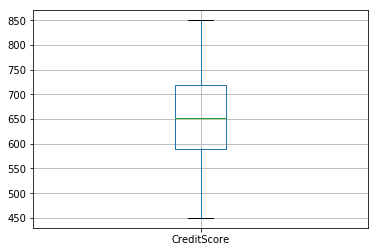

In [29]:
data.boxplot(column=['CreditScore'])

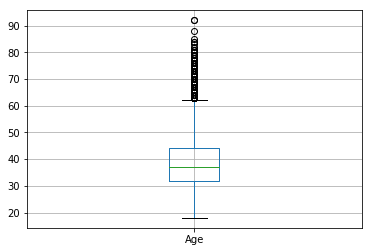

In [30]:
data.boxplot(column=['Age'])

In [0]:
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)
IQR = q3-q1
mean = data['Age'].mean()
ulim = mean+1.5*IQR
llim = mean-1.5*IQR

In [32]:
data['Age'].median()

37.0

In [0]:
data['Age'] = np.where(data['Age']>ulim, data['Age'].median(), data['Age'])

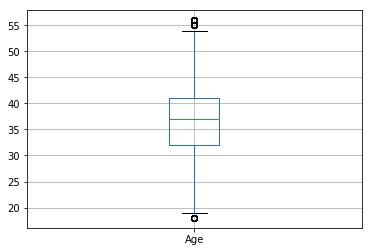

In [34]:
data.boxplot(column=['Age'])

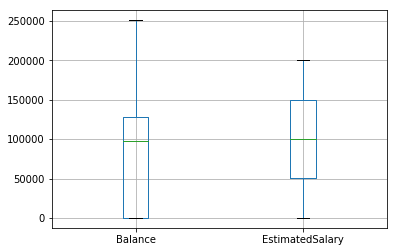

In [35]:
data.boxplot(column = ['Balance','EstimatedSalary'] )

### Check if the data is Balanced or not based on the dependent variable

In [36]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Data is imbalanced. Data is more biased towards the customers that have exited the bank.

### Upsampling the data by resampling the category that is in minority

In [0]:
data_majority = data.drop(columns='Surname')[data.Exited==0]
data_minority = data.drop(columns='Surname')[data.Exited==1]

In [0]:
from sklearn.utils import resample

data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=7963,    # to match majority class
                                 random_state=123)

In [39]:
data_minority_upsampled.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7445,516.0,France,Female,45.0,4,0.00,1,1,0,95273.73,1
6729,454.0,Germany,Female,50.0,10,92895.56,1,1,0,154344.00,1
6812,576.0,Germany,Male,37.0,3,148843.56,1,1,0,69414.13,1
6497,669.0,France,Male,50.0,9,201009.64,1,1,0,158032.50,1
9858,507.0,Germany,Male,40.0,3,120105.43,1,1,0,92075.01,1


In [40]:
data_minority_upsampled.shape

(7963, 11)

In [41]:
data.shape

(10000, 12)

In [0]:
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

In [43]:
data_upsampled.Exited.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Now, the data is very much balanced and good to work on.

In [44]:
pd.unique(data_upsampled.Geography)

array(['Spain', 'France', 'Germany'], dtype=object)

In [45]:
data_upsampled.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0


In [46]:
pd.unique(data.Surname).size

2932

In [47]:
data_upsampled.shape

(15926, 11)

In [0]:
#Checking the output of pandas profiling to check if it can be used.

#import pandas_profiling
#pandas_profiling.ProfileReport(data_upsampled)

In [49]:
data_upsampled.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [50]:
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [0]:
data_upsampled.sort_index(inplace = True)
data_upsampled.reset_index(inplace = True)

### OneHotEncoding of the data after doing a label encoding

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()

In [0]:
data['Gender']= le.fit_transform(data['Gender']) 
data['Geography']= le.fit_transform(data['Geography'])
data_upsampled['Gender']= le.fit_transform(data_upsampled['Gender']) 
data_upsampled['Geography']= le.fit_transform(data_upsampled['Geography'])

In [55]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,Hill,608.0,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,Onio,502.0,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,Boni,699.0,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,Mitchell,850.0,2,0,43.0,2,125510.82,1,1,1,79084.10,0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Surname            10000 non-null object
CreditScore        10000 non-null float64
Geography          10000 non-null int64
Gender             10000 non-null int64
Age                10000 non-null float64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 937.6+ KB


In [57]:
data_upsampled.head()

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,0,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
2,0,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
3,1,608.0,2,0,41.0,1,83807.86,1,0,1,112542.58,0
4,2,502.0,0,0,42.0,8,159660.80,3,1,0,113931.57,1


In [0]:
gender_up = tf.keras.utils.to_categorical(data_upsampled['Gender'], num_classes=2)
gender = tf.keras.utils.to_categorical(data['Gender'], num_classes=2)

In [0]:
gender = pd.DataFrame(gender)
gender_up = pd.DataFrame(gender_up)

In [60]:
gender.columns = ['Female','Male']
gender_up.colmuns = ['Female', 'Male']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [61]:
gender.shape

(10000, 2)

In [62]:
gender_up.reindex(data_upsampled.index)
gender.reindex(data.index)

,Female,Male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,1.0
6,0.0,1.0
7,1.0,0.0
8,0.0,1.0
9,0.0,1.0


In [0]:
geography_up = tf.keras.utils.to_categorical(data_upsampled['Geography'], num_classes=3)
geography = tf.keras.utils.to_categorical(data['Geography'], num_classes=3)

In [0]:
geography = pd.DataFrame(geography)
geography_up = pd.DataFrame(geography_up)

In [0]:
geography.columns = ['France','Germany','Spain',]
geography_up.columns = ['France','Germany','Spain',]

In [66]:
geography_up.reindex(data_upsampled.index)
geography.reindex(data.index)

,France,Germany,Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,1.0,0.0,0.0
7,0.0,1.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


In [67]:
data_upsampled.head(10)
data.head(10)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,Hill,608.0,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,Onio,502.0,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,Boni,699.0,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,Mitchell,850.0,2,0,43.0,2,125510.82,1,1,1,79084.10,0
5,Chu,645.0,2,1,44.0,8,113755.78,2,1,0,149756.71,1
6,Bartlett,822.0,0,1,50.0,7,0.00,2,1,1,10062.80,0
7,Obinna,652.0,1,0,29.0,4,115046.74,4,1,0,119346.88,1
8,He,501.0,0,1,44.0,4,142051.07,2,0,1,74940.50,0
9,H?,684.0,0,1,27.0,2,134603.88,1,1,1,71725.73,0


In [0]:
data_temp_up = pd.concat([data_upsampled, gender_up], axis = 1)
data_temp = pd.concat([data, gender], axis = 1)

In [0]:
data_final_up = pd.concat([data_temp_up,geography_up], axis = 1)
data_final = pd.concat([data_temp,geography], axis = 1)

In [0]:
data_final.drop(columns = {'Geography','Gender','Surname'}, inplace = True)
data_final_up.drop(columns = {'Geography','Gender','index'}, inplace = True)
#data_final_up.drop(columns = {'index'}, inplace = True)

In [71]:
data_final.head()
data_final_up.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,0,1,France,Germany,Spain
0,619.0,42.0,2,0.00,1,1,1,101348.88,1,1.0,0.0,1.0,0.0,0.0
1,619.0,42.0,2,0.00,1,1,1,101348.88,1,1.0,0.0,1.0,0.0,0.0
2,619.0,42.0,2,0.00,1,1,1,101348.88,1,1.0,0.0,1.0,0.0,0.0
3,608.0,41.0,1,83807.86,1,0,1,112542.58,0,1.0,0.0,0.0,0.0,1.0
4,502.0,42.0,8,159660.80,3,1,0,113931.57,1,1.0,0.0,1.0,0.0,0.0


In [72]:
data_final_up = data_final_up.astype('float32')
data_final_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Data columns (total 14 columns):
CreditScore        15926 non-null float32
Age                15926 non-null float32
Tenure             15926 non-null float32
Balance            15926 non-null float32
NumOfProducts      15926 non-null float32
HasCrCard          15926 non-null float32
IsActiveMember     15926 non-null float32
EstimatedSalary    15926 non-null float32
Exited             15926 non-null float32
0                  15926 non-null float32
1                  15926 non-null float32
France             15926 non-null float32
Germany            15926 non-null float32
Spain              15926 non-null float32
dtypes: float32(14)
memory usage: 871.0 KB


In [73]:
data_final = data_final.astype('float32')
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
CreditScore        10000 non-null float32
Age                10000 non-null float32
Tenure             10000 non-null float32
Balance            10000 non-null float32
NumOfProducts      10000 non-null float32
HasCrCard          10000 non-null float32
IsActiveMember     10000 non-null float32
EstimatedSalary    10000 non-null float32
Exited             10000 non-null float32
Female             10000 non-null float32
Male               10000 non-null float32
France             10000 non-null float32
Germany            10000 non-null float32
Spain              10000 non-null float32
dtypes: float32(14)
memory usage: 547.0 KB


### Test Train Split of the onehot encoded data to build the model

In [0]:
y = data_final['Exited'].values
y_up = data_final_up['Exited'].values

In [0]:
X = data_final.drop(columns = 'Exited').values
X_up = data_final_up.drop(columns = 'Exited').values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 123)
X_train_up,X_test_up,y_train_up,y_test_up = train_test_split(X_up,y_up,test_size = 0.3, random_state = 123)

### Buiding Graph for Tensorflow Keras

#### With upsampled Data

In [0]:
y_train_up = np.asarray(y_train_up).astype('float32').reshape((-1,1))

Index([    'CreditScore',             'Age',          'Tenure',
               'Balance',   'NumOfProducts',       'HasCrCard',
        'IsActiveMember', 'EstimatedSalary',          'Exited',
                       0,                 1,          'France',
               'Germany',           'Spain'],
      dtype='object')

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(X_train_up,np.array(y_train_up),          
          validation_data=(X_test_up,np.array(y_test_up)),
          epochs=200,
          batch_size=30)

Train on 11148 samples, validate on 4778 samples
Epoch 1/200
11148/11148 [==============================] - 3s 244us/sample - loss: 0.6907 - acc: 0.5358 - val_loss: 0.6833 - val_acc: 0.5004
Epoch 2/200
11148/11148 [==============================] - 2s 192us/sample - loss: 0.6633 - acc: 0.6368 - val_loss: 0.6243 - val_acc: 0.7022
Epoch 3/200
11148/11148 [==============================] - 2s 188us/sample - loss: 0.5841 - acc: 0.7031 - val_loss: 0.5717 - val_acc: 0.7145
Epoch 4/200
11148/11148 [==============================] - 2s 188us/sample - loss: 0.5664 - acc: 0.7051 - val_loss: 0.5656 - val_acc: 0.7131
Epoch 5/200
11148/11148 [==============================] - 2s 189us/sample - loss: 0.5665 - acc: 0.7118 - val_loss: 0.5649 - val_acc: 0.7124
Epoch 6/200
11148/11148 [==============================] - 2s 197us/sample - loss: 0.5690 - acc: 0.7043 - val_loss: 0.5661 - val_acc: 0.7072
Epoch 7/200
11148/11148 [==============================] - 2s 209us/sample - loss: 0.5623 - acc: 0.7144 -

Upsampling the data decreased the accuracy of the mode. 

#### With actual Data

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))

In [0]:
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=200,
          batch_size=30)

Train on 7000 samples, validate on 3000 samples
Epoch 1/200
7000/7000 [==============================] - 2s 273us/sample - loss: 0.5075 - acc: 0.7954 - val_loss: 0.5019 - val_acc: 0.7983
Epoch 2/200
7000/7000 [==============================] - 1s 183us/sample - loss: 0.5041 - acc: 0.7954 - val_loss: 0.4968 - val_acc: 0.7983
Epoch 3/200
7000/7000 [==============================] - 1s 182us/sample - loss: 0.5003 - acc: 0.7954 - val_loss: 0.4915 - val_acc: 0.7983
Epoch 4/200
7000/7000 [==============================] - 1s 186us/sample - loss: 0.4917 - acc: 0.7954 - val_loss: 0.4790 - val_acc: 0.7983
Epoch 5/200
7000/7000 [==============================] - 1s 178us/sample - loss: 0.4731 - acc: 0.7954 - val_loss: 0.4493 - val_acc: 0.7983
Epoch 6/200
7000/7000 [==============================] - 1s 187us/sample - loss: 0.4453 - acc: 0.7997 - val_loss: 0.4300 - val_acc: 0.8223
Epoch 7/200
7000/7000 [==============================] - 1s 186us/sample - loss: 0.4315 - acc: 0.8124 - val_loss: 0.41

### Trying PCA on the given data to see if it can improve the accuracy.(though the number of columns are less, checking if the it is possible)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Surname            10000 non-null object
CreditScore        10000 non-null float64
Geography          10000 non-null int64
Gender             10000 non-null int64
Age                10000 non-null float64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 937.6+ KB


Removing the surname column as it has about 2000 distinct surnames, i.e. too many categorical variables to work with(not fesible)

In [0]:
data.drop(columns='Surname', inplace = True)

In [0]:
data = data.astype('float32')

In [0]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0.0,0.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,1.0
1,608.0,2.0,0.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0
2,502.0,0.0,0.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,1.0
3,699.0,0.0,0.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0
4,850.0,2.0,0.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0


In [0]:
geo = tf.keras.utils.to_categorical(data['Geography'], num_classes=3)

In [0]:
geo = pd.DataFrame(geo)

In [0]:
geo.columns = ['France','Germany','Spain']

In [0]:
gen = tf.keras.utils.to_categorical(data['Gender'],num_classes=2)

In [0]:
gen = pd.DataFrame(gen)

In [0]:
gen.columns = ['Female','Male']

In [0]:
data = pd.concat([data, gen], axis = 1)

In [0]:
data = pd.concat([data, geo],axis = 1)

In [0]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Female', 'Male', 'France', 'Germany', 'Spain'],
      dtype='object')

In [0]:
data.drop(columns = {'Gender','Geography'},inplace = True)

#### Applying PCA to check the required variables

In [0]:
data_columns = data.columns

In [0]:
from sklearn import preprocessing

In [0]:
data.drop(columns = 'Surname',inplace = True)

In [0]:
scaler = preprocessing.StandardScaler().fit(data)
data_transformed = pd.DataFrame(scaler.transform(data))
data_transformed.columns = data_columns

In [84]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_transformed)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [85]:
data_pca = pca.transform(data_transformed)
data_pca.shape

(10000, 11)

In [86]:
rel_data = pd.DataFrame(pca.components_)
rel_data.columns = data_columns
rel_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.031615,0.128074,-0.146470,0.494404,-0.035078,0.427515,-0.352825,-0.042207,-0.229515,0.027187,0.594159
1,-0.025245,-0.067912,-0.284521,0.326412,0.044237,-0.543772,0.590181,0.016656,-0.227640,0.048123,0.326928
2,0.278974,0.211088,-0.137815,0.171543,-0.562408,-0.028214,0.102595,-0.494144,0.503836,-0.059448,0.002890
3,0.405723,0.682410,0.285630,0.130223,0.463060,0.006940,0.167166,0.110942,0.120306,0.043047,0.010540
4,-0.068476,0.023183,-0.042921,-0.123258,0.126251,0.059695,0.020156,-0.417465,-0.107045,0.877189,-0.051330
5,-0.809805,0.383657,0.279341,0.066071,-0.007732,-0.056310,0.096800,-0.267127,0.027838,-0.172275,-0.014702
6,0.221610,-0.400448,0.424515,0.136555,0.321697,-0.061248,-0.031770,-0.613736,-0.158684,-0.282588,0.041364
7,0.053658,0.285872,-0.621676,-0.378108,0.225874,0.079535,-0.031567,-0.344403,-0.304019,-0.330198,-0.086826
8,-0.206163,-0.229287,-0.359425,0.211002,0.542888,0.026956,-0.082642,-0.009700,0.654782,-0.001331,-0.009841
9,-0.029119,-0.158619,0.073291,-0.262577,0.012182,0.631189,0.651075,0.010088,0.109984,-0.058309,0.248254


In [87]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 13.53689233,  24.85611504,  34.38013128,  43.60832315,
        52.76855809,  61.81652656,  70.67819108,  79.45601861,
        88.08959964,  94.41599485, 100.        ])

#### spliting the data and training the model

In [0]:
y = data['Exited']

In [0]:
X = data.drop(columns = 'Exited').values

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 123)

In [0]:
y_test.value_counts()

0.0    2395
1.0     605
Name: Exited, dtype: int64

In [0]:
y_train.value_counts()

0.0    5568
1.0    1432
Name: Exited, dtype: int64

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')
y_train = y_train.astype('float32')

In [0]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dense(20, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(50, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.5)
model1.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model1.fit(X_train,np.array(y_train),          
          validation_data=(X_test,np.array(y_test)),
          epochs=200,
          batch_size=35)

Train on 7000 samples, validate on 3000 samples
Epoch 1/200
7000/7000 [==============================] - 1s 164us/sample - loss: 0.5250 - acc: 0.7939 - val_loss: 0.5084 - val_acc: 0.7983
Epoch 2/200
7000/7000 [==============================] - 1s 116us/sample - loss: 0.5128 - acc: 0.7954 - val_loss: 0.5331 - val_acc: 0.7983
Epoch 3/200
7000/7000 [==============================] - 1s 117us/sample - loss: 0.5140 - acc: 0.7954 - val_loss: 0.5230 - val_acc: 0.7983
Epoch 4/200
7000/7000 [==============================] - 1s 115us/sample - loss: 0.5134 - acc: 0.7954 - val_loss: 0.5024 - val_acc: 0.7983
Epoch 5/200
7000/7000 [==============================] - 1s 114us/sample - loss: 0.5108 - acc: 0.7954 - val_loss: 0.5040 - val_acc: 0.7983
Epoch 6/200
7000/7000 [==============================] - 1s 125us/sample - loss: 0.5111 - acc: 0.7954 - val_loss: 0.5061 - val_acc: 0.7983
Epoch 7/200
7000/7000 [==============================] - 1s 115us/sample - loss: 0.5091 - acc: 0.7954 - val_loss: 0.50